<a href="https://colab.research.google.com/github/jfink09/Aerospace-Engineering/blob/master/Phugoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import linalg as LA
from numpy import *
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [129]:
# Define variables and constants

Iy = 1249
e = 0.6
epsilon = 0.413
at = 3.66
chord = 5.25
aw = 5.05
b = 30
Sw = b*chord
weight = 2400
m = weight/32
g = 32
f = 5
lt = 13.96-1
St = 10*2.5
eta = 1
S = St + Sw
AR = Sw/b

In [130]:
# Calculations
Cl_alpha = aw+eta*at*(St/S)*(1-epsilon)
hnw = 0.25
h1 = lt/chord
hn = (hnw+h1*eta*(St/S)*(at/aw)*(1-epsilon))/(1+h1*(St/S)*(at/aw)*(1-epsilon))
distToCG = 86/12
distToLE = 78.4/12
h = (distToCG-distToLE)/chord
StabMargin = (hn-h)
Cm_alpha = (h-hn)*Cl_alpha

# Print Values
print('Cl_alpha = ',Cl_alpha)
print('hn = ',hn)
print('h = ',h)
print('StabMargin = ',StabMargin)
print('Cm_alpha = ',Cm_alpha)

Cl_alpha =  5.344304109589041
hn =  0.34432736541972797
h =  0.12063492063492054
StabMargin =  0.22369244478480743
Cm_alpha =  -1.195480451947466


In [131]:
# Stability derivatives
U0 = 147
theta0 = 0
rho = 0.00237

drag = 0.5*rho*U0**2*f
T0 = drag
Xu = (-1/m)*((T0/U0)+rho*U0*f)
Cl0 = weight/(0.5*rho*U0**2*S)

pi = 3.1415926535

X_alpha = (-1/m)*((rho*U0**2*Sw*Cl0*Cl_alpha)/(pi*AR*e))
Zu = (-1/m)*rho*U0*Sw*Cl0
Z_alpha = (-1/m)*0.5*rho*U0**2*Sw*Cl_alpha
Zq = -eta*(1/(2*m))*rho*U0*at*St*lt
M_alpha = (1/Iy)*0.5*rho*U0**2*S*chord*Cm_alpha
Mq = (m/Iy)*lt*Zq
Z_alphadot = -eta*(1/(2*m))*rho*U0*at*St*lt*epsilon
M_alphadot = (m/Iy)*lt*Z_alphadot

# Print Values
print('drag = ',drag)
print('T0 = ',T0)
print('Xu = ',Xu)
print('Cl0 = ',Cl0)
print('X_alpha = ',X_alpha)
print('Zu = ',Zu)
print('Z_alpha = ',Z_alpha)
print('Zq = ',Zq)
print('M_alpha = ',M_alpha)
print('Mq = ',Mq)
print('Z_alphadot = ',Z_alphadot)
print('M_alphadot = ',M_alphadot)

drag =  128.03332500000002
T0 =  128.03332500000002
Xu =  -0.034839
Cl0 =  0.5135649227069143
X_alpha =  -29.828292960499283
Zu =  -0.37573385518590996
Z_alpha =  -287.38459048397675
Zq =  -2.7542319840000005
M_alpha =  -23.483089469752933
Mq =  -2.143405515170537
Z_alphadot =  -1.137497809392
M_alphadot =  -0.8852264777654316


In [132]:
# Matrix form
MatrixForm = np.matrix([['U0', U0], 
                        ['theta0', theta0], 
                        ['Iy', Iy], 
                        ['e', e], 
                        ['epsilon', epsilon], 
                        ['at', at], 
                        ['chord', chord], 
                        ['Cl_alpha', Cl_alpha], 
                        ['Sw', Sw], 
                        ['weight', weight],
                        ['m', m],
                        ['g', g],
                        ['f', f],
                        ['rho', rho],
                        ['lt', lt],
                        ['St', St],
                        ['eta', eta],
                        ['f', f],
                        ['M_alpha', M_alpha]])
MatrixForm

matrix([['U0', '147'],
        ['theta0', '0'],
        ['Iy', '1249'],
        ['e', '0.6'],
        ['epsilon', '0.413'],
        ['at', '3.66'],
        ['chord', '5.25'],
        ['Cl_alpha', '5.344304109589041'],
        ['Sw', '157.5'],
        ['weight', '2400'],
        ['m', '75.0'],
        ['g', '32'],
        ['f', '5'],
        ['rho', '0.00237'],
        ['lt', '12.96'],
        ['St', '25.0'],
        ['eta', '1'],
        ['f', '5'],
        ['M_alpha', '-23.483089469752933']], dtype='<U19')

In [133]:
# State space 
AA = np.matrix([[Xu, X_alpha, -g, 0],
                [(Zu/(U0-Z_alphadot)), (Z_alpha/(U0-Z_alphadot)), 0, ((Zq+U0)/(U0-Z_alphadot))],
                [0,0,0,1],
                [((M_alphadot*Zu)/(U0-Z_alphadot)), M_alpha+((M_alphadot*Z_alpha)/(U0-Z_alphadot)),0,Mq+M_alphadot*((Zq+U0)/(U0-Z_alphadot))]])

State_Space = np.round(AA,3)
State_Space

array([[-3.5000e-02, -2.9828e+01, -3.2000e+01,  0.0000e+00],
       [-3.0000e-03, -1.9400e+00,  0.0000e+00,  9.7400e-01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00],
       [ 2.0000e-03, -2.1766e+01,  0.0000e+00, -3.0050e+00]])

In [134]:
# Eigenvalues
eigenvalues = LA.eigvals(AA)

# Print eigenvalues
print(eigenvalues)

[-2.48081941+4.56110854j -2.48081941-4.56110854j -0.00928089+0.26573595j
 -0.00928089-0.26573595j]


In [135]:
eigenvalue_1 = eigenvalues[0]
eigenvalue_2 = eigenvalues[1]
eigenvalue_3 = eigenvalues[2]
eigenvalue_4 = eigenvalues[3]

In [136]:
# Find the real part of the eigenvalues
real_eigenvalues = np.real(eigenvalues)
real_eigenvalues

array([-2.48081941, -2.48081941, -0.00928089, -0.00928089])

In [137]:
# Store each eigenvalue as a variable
e1 = real_eigenvalues[0]
e2 = real_eigenvalues[1]
e3 = real_eigenvalues[2]
e4 = real_eigenvalues[3]

# Print the real parts of the eigenvalues as values
print(e1)
print(e2)
print(e3)
print(e4)

-2.4808194109916624
-2.4808194109916624
-0.009280889882230331
-0.009280889882230331


In [138]:
# Load CSV data
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['phugoidData.csv']))

Saving phugoidData.csv to phugoidData (1).csv


In [139]:
# Show CSV data in a pandas dataframe
df

,0.,50.74,38.07,0.06,-0.954
0,0.204,50.97,38.62,0.077,-0.910
1,0.300,51.03,38.49,0.083,-0.921
2,0.400,51.12,38.60,0.090,-0.912
3,0.500,51.34,38.37,0.107,-0.931
4,0.600,51.35,38.12,0.108,-0.950
...,...,...,...,...,...
936,94.100,51.33,36.72,0.106,-1.063
937,94.200,51.31,36.69,0.105,-1.065
938,94.300,51.19,36.74,0.095,-1.061
939,94.400,50.96,37.10,0.077,-1.032


In [140]:
Time = df['0.']
A5 = df['-0.954']

print(Time)
print(A5)

0       0.204
1       0.300
2       0.400
3       0.500
4       0.600
        ...  
936    94.100
937    94.200
938    94.300
939    94.400
940    94.500
Name: 0., Length: 941, dtype: float64
0     -0.910
1     -0.921
2     -0.912
3     -0.931
4     -0.950
       ...  
936   -1.063
937   -1.065
938   -1.061
939   -1.032
940   -1.045
Name: -0.954, Length: 941, dtype: float64


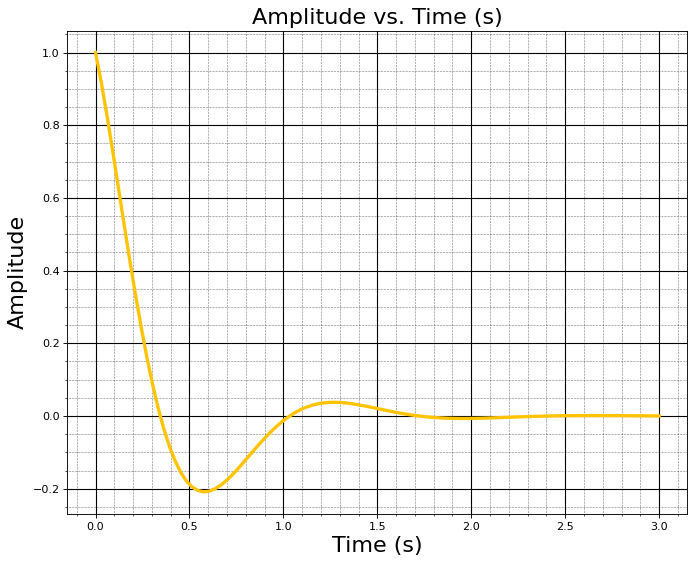

In [141]:
# Plot for short period response
x = np.linspace(0,3,100)          # Time
y = np.exp(eigenvalue_1*x)        # Exponential of eigenvalue 1
y1 = np.real(y)                   # Real part of the exponential of eigenvalue 1

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title('Amplitude vs. Time (s)')

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(x,y1, linewidth=3, color='#FFC406')

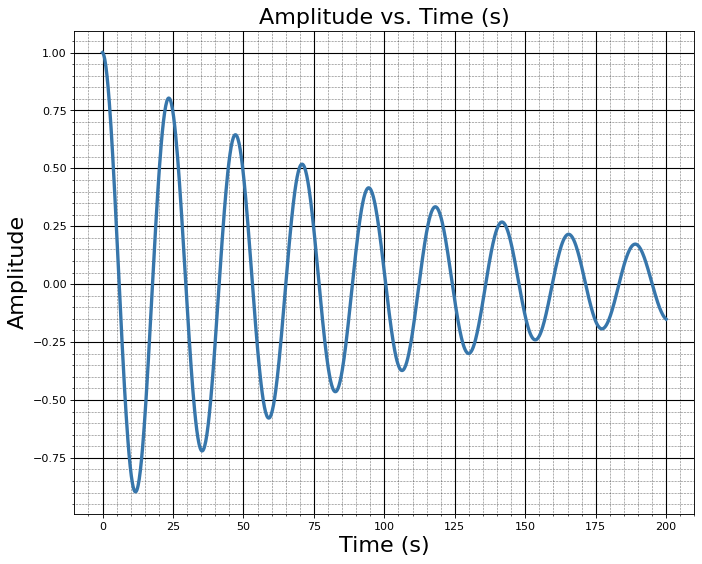

In [142]:
# Plot for long period (phugoid) response
x = np.linspace(0,200,1000)       # Time
y = np.exp(eigenvalue_3*x)        # Exponential of eigenvalue 3
y1 = np.real(y)                   # Real part of the exponential of eigenvalue 3

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title('Amplitude vs. Time (s)')

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(x,y1, linewidth=3, color='#3776AB')

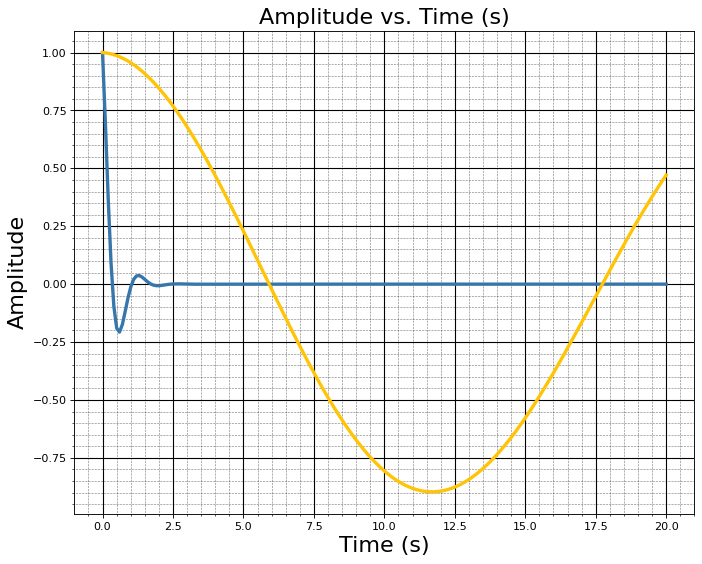

In [185]:
# Plot of both
x = np.linspace(0,20,200)        # Time for plots
y = np.exp(eigenvalue_1*x)       # Exponential of eigenvalue 1
y1 = np.exp(eigenvalue_3*x)      # Exponential of eigenvalue 3
y2 = np.real(y)                  # Real part of the exponential of eigenvalue 1
y3 = np.real(y1)                 # Real part of the exponential of eigenvalue 3

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title('Amplitude vs. Time (s)')

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(x,y2, linewidth=3, color='#3776AB')        # Plot 1
plt.plot(x,y3, linewidth=3, color='#FFC406')       # Plot 2

In [144]:
# Define McCormick Values
g2 = 32
theta02 = 0
U02 = 147 
X_alpha2 = -27.64 
Z_alpha2 = -258 
Zq2 = -2.655 
M_alphadot2 = -0.7149
Xu2 = -0.07151 
Zu2 = -0.439
M_alpha2 = -17.34
Mq2 = -1.927
Z_alphadot2 = -1.1375

In [145]:
# Table comparing values with McCormick
NewTable = np.matrix([["Xu", Xu, Xu2],
                      ["Zu", Zu, Zu2],
                      ["X_alpha", X_alpha, X_alpha2],
                      ["Z_alpha", Z_alpha, Z_alpha2],
                      ["M_alpha", M_alpha, M_alpha2],
                      ["Zq", Zq, Zq2],
                      ["Mq", Mq, Mq2],
                      ["Z_alphadot", Z_alphadot, Z_alphadot2],
                      ["M_alphadot", M_alphadot, M_alphadot2]])

print('Comparison with McCormick: \n',NewTable)

Comparison with McCormick: 
 [['Xu' '-0.034839' '-0.07151']
 ['Zu' '-0.37573385518590996' '-0.439']
 ['X_alpha' '-29.828292960499283' '-27.64']
 ['Z_alpha' '-287.38459048397675' '-258']
 ['M_alpha' '-23.483089469752933' '-17.34']
 ['Zq' '-2.7542319840000005' '-2.655']
 ['Mq' '-2.143405515170537' '-1.927']
 ['Z_alphadot' '-1.137497809392' '-1.1375']
 ['M_alphadot' '-0.8852264777654316' '-0.7149']]


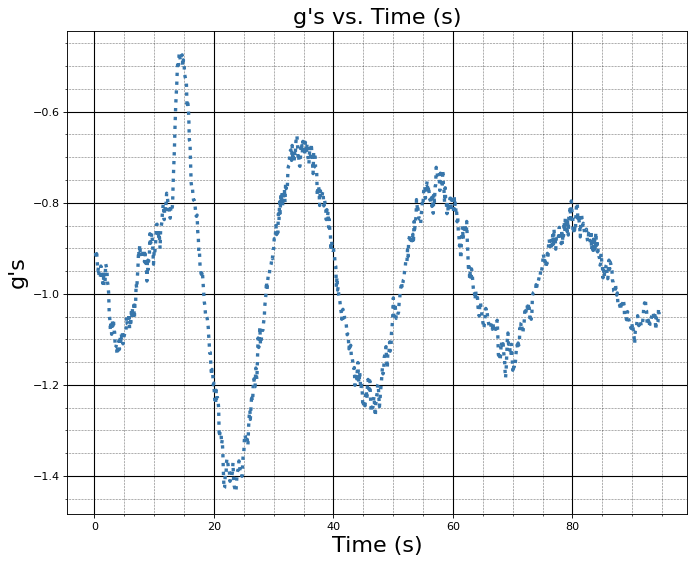

In [179]:
# Plot CSV Data
x = np.linspace(0,90,300)        # Time

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel("g's")
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title("g's vs. Time (s)")

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(Time,A5, linestyle=':', linewidth=3, color='#3776AB')            # Time and A5 defined previously when imported CSV

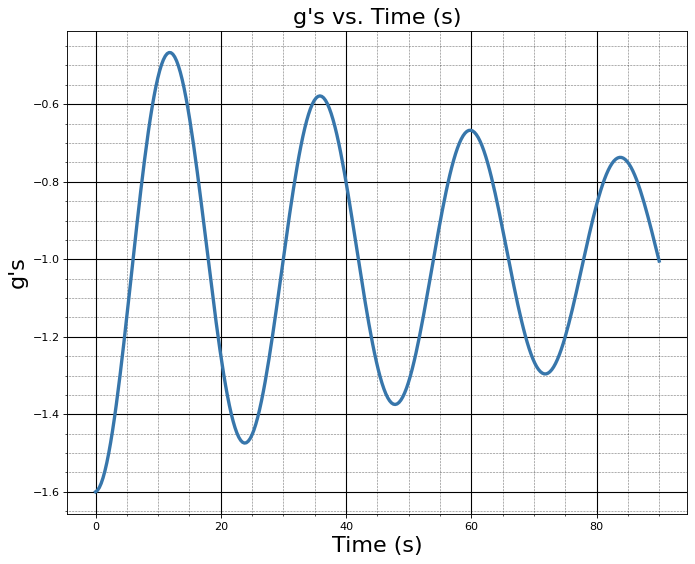

In [175]:
x = np.linspace(0,90,300)                       # Time
y = -1-0.6*np.exp(-0.009834*x)*np.cos(0.262*x)  # Plot 5 function

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Time (s)')
plt.ylabel("g's")
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title("g's vs. Time (s)")

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(x,y, linewidth=3, color='#3776AB')

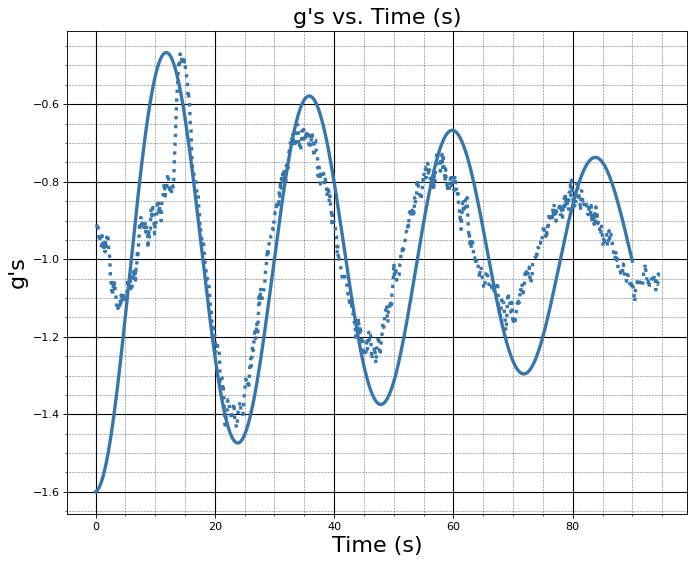

In [184]:
# Plot of plots 4 and 5 overlapping each other

y = -1-0.6*np.exp(-0.009834*x)*np.cos(0.262*x)        # From plot 5

# Style plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel("g's")
plt.rc('axes', titlesize=20)      # fontsize of the axes title
plt.rc('axes', labelsize=20)
plt.title("g's vs. Time (s)")

# Add minor grid
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth=1, color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')

# Show the plot
plt.plot(Time,A5, linestyle=':', linewidth=3, color='#3776AB')            # Plot 4
plt.plot(x,y3, linewidth=3, color='#3776AB')                              # Plot 5